In [9]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from mpl_toolkits import mplot3d 
from sklearn.metrics import r2_score

In [10]:
corr_file = "correlationFluorescence.xlsx"

In [12]:
corr_data = pd.read_excel(corr_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )


corr_data.head(20)

,koide ID,kraken_index,fluor_expr,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,1.0,8.0,1.28,-0.043479,1.820164,-0.222589,-0.028099,-0.125344,0.194489,0.040391,...,6.042971,6.042803,6.210989,0.168186,6.210989,6.778337,6.776344,7.604455,0.828112,7.604455
1,2.0,473.0,1.98,-0.037038,1.871216,-0.242356,-0.059912,-0.151134,0.182444,0.062602,...,6.497699,6.034963,7.308214,1.273251,6.037221,6.967081,6.949840,6.990305,0.040465,6.990305
2,3.0,238.0,3.93,-0.047461,1.86016,-0.22115,0.0328,-0.094175,0.25395,0.017462,...,3.511176,3.511176,3.511176,0.000000,3.511176,7.299284,7.299284,7.299284,0.000000,7.299284
3,5.0,53.0,1.03,-0.039828,1.919713,-0.227681,-0.026131,-0.126906,0.201549,0.039969,...,5.934360,5.835709,6.026880,0.191171,5.863930,6.779832,6.518659,6.858913,0.340254,6.697037
4,7.0,740.0,1.52,-0.026401,1.900154,-0.25405,-0.07988,-0.166965,0.17417,0.080029,...,6.034069,6.029424,6.034070,0.004646,6.034070,6.910345,6.910344,6.919218,0.008874,6.910344
5,8.0,186.0,1.76,-0.020929,1.985677,-0.233839,-0.020213,-0.127026,0.213626,0.037782,...,7.105580,6.912365,7.975052,1.062687,7.013743,7.442859,6.799453,8.350309,1.550856,7.634683
6,9.0,111.0,0.99,-0.05596,1.840787,-0.2041,-0.02252,-0.11331,0.18158,0.035354,...,6.029479,6.029479,6.029479,0.000000,6.029479,6.993123,6.993123,6.993123,0.000000,6.993123
7,13.0,60.0,1.14,-0.037637,1.86016,-0.23821,-0.04316,-0.140685,0.19505,0.050736,...,6.051845,6.051845,6.051845,0.000000,6.051845,6.943428,6.943428,6.943428,0.000000,6.943428
8,15.0,61.0,0.97,-0.05646,1.840158,-0.20995,-0.022226,-0.116088,0.187724,0.035894,...,6.043525,6.032103,6.049074,0.016970,6.049074,6.958548,6.934667,6.976559,0.041892,6.934667
9,18.0,17.0,0.66,-0.053401,1.840166,-0.21957,-0.02314,-0.121355,0.19643,0.037487,...,6.029835,6.029835,6.029835,0.000000,6.029835,6.923739,6.923739,6.923739,0.000000,6.923739


In [4]:
corr_data = corr_data.loc[:, corr_data.columns!='koide ID']
corr_data = corr_data.loc[:, corr_data.columns!='kraken_index']
corr_data.head()

,fluor_expr,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,somo_rc_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,1.28,-0.043479,1.820164,-0.222589,-0.028099,-0.125344,0.194489,0.040391,0.058946,-0.384740,...,6.042971,6.042803,6.210989,0.168186,6.210989,6.778337,6.776344,7.604455,0.828112,7.604455
1,1.98,-0.037038,1.871216,-0.242356,-0.059912,-0.151134,0.182444,0.062602,0.034859,-0.405812,...,6.497699,6.034963,7.308214,1.273251,6.037221,6.967081,6.949840,6.990305,0.040465,6.990305
2,3.93,-0.047461,1.86016,-0.22115,0.0328,-0.094175,0.25395,0.017462,0.13737,-0.420450,...,3.511176,3.511176,3.511176,0.000000,3.511176,7.299284,7.299284,7.299284,0.000000,7.299284
3,1.03,-0.039828,1.919713,-0.227681,-0.026131,-0.126906,0.201549,0.039969,0.074128,-0.391025,...,5.934360,5.835709,6.026880,0.191171,5.863930,6.779832,6.518659,6.858913,0.340254,6.697037
4,1.52,-0.026401,1.900154,-0.25405,-0.07988,-0.166965,0.17417,0.080029,0.00578,-0.411720,...,6.034069,6.029424,6.034070,0.004646,6.034070,6.910345,6.910344,6.919218,0.008874,6.910344


In [5]:
corr_data.corr()

,somo_rc_boltz,nbo_P_boltz,nbo_P_ra_boltz,nbo_P_rc_boltz,spindens_P_rc_boltz,nmr_P_boltz,nmrtens_sxx_P_boltz,nmrtens_syy_P_boltz,nmrtens_szz_P_boltz,efg_amp_P_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
somo_rc_boltz,1.000000,0.459174,0.481835,-0.259684,-0.785553,-0.161318,-0.130076,-0.231924,-0.029966,0.462430,...,0.557498,0.655569,0.373155,-0.248938,0.369407,0.699479,0.552609,0.230935,-0.140090,0.211886
nbo_P_boltz,0.459174,1.000000,0.918429,0.621623,-0.424801,-0.805924,-0.842226,-0.864519,-0.371334,0.728257,...,0.636493,0.621251,0.676981,0.333391,0.568885,0.464049,-0.004474,0.687923,0.492413,0.454666
nbo_P_ra_boltz,0.481835,0.918429,1.000000,0.681127,-0.233596,-0.885195,-0.877686,-0.903204,-0.619418,0.853028,...,0.798750,0.811193,0.752284,0.203495,0.692109,0.350742,-0.000955,0.438277,0.312672,0.217536
nbo_P_rc_boltz,-0.259684,0.621623,0.681127,1.000000,0.441105,-0.871032,-0.875582,-0.823260,-0.729100,0.456965,...,0.375974,0.311127,0.491755,0.435836,0.446782,-0.204976,-0.450092,0.385613,0.522702,0.206488
spindens_P_rc_boltz,-0.785553,-0.424801,-0.233596,0.441105,1.000000,-0.096787,-0.048993,0.029182,-0.461149,-0.259604,...,-0.224490,-0.279358,-0.155084,0.112997,-0.070159,-0.779173,-0.513012,-0.367422,0.021060,-0.304807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sterimol_burL_boltz,0.699479,0.464049,0.350742,-0.204976,-0.779173,-0.161127,-0.198965,-0.239170,0.143884,0.115129,...,0.133007,0.251129,0.000260,-0.346567,-0.147942,1.000000,0.852204,0.187106,-0.336425,0.158376
sterimol_burL_min,0.552609,-0.004474,-0.000955,-0.450092,-0.513012,0.125747,0.130454,0.098818,0.140931,-0.213351,...,-0.089507,0.072707,-0.307028,-0.641015,-0.389628,0.852204,1.000000,-0.240744,-0.722602,-0.128905
sterimol_burL_max,0.230935,0.687923,0.438277,0.385613,-0.367422,-0.380816,-0.418345,-0.455735,-0.023325,0.277909,...,0.304824,0.207492,0.510011,0.611185,0.431075,0.187106,-0.240744,1.000000,0.844896,0.936113
sterimol_burL_delta,-0.140090,0.492413,0.312672,0.522702,0.021060,-0.340526,-0.369849,-0.379042,-0.094285,0.315516,...,0.266430,0.107707,0.532451,0.788583,0.521757,-0.336425,-0.722602,0.844896,1.000000,0.737756


In [6]:
pd.options.display.max_rows = 4000
pears = corr_data.corrwith(corr_data['fluor_expr']).sort_values(ascending=False)

pears

AttributeError: 'float' object has no attribute 'shape'

ValueError: could not convert string to float: 'spindens vs fluor'

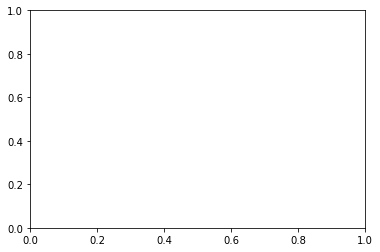

In [7]:
x = corr_data['spindens_P_ra_boltz']
y = corr_data['fluor_expr']

plt.scatter(x, y)
plt.xlabel('spindens_P_ra_boltz')
plt.ylabel('fluor_expr')
plt.show()

ValueError: could not convert string to float: 'fluor_expr'

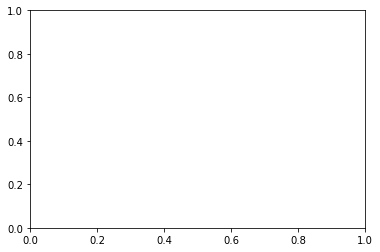

In [8]:
x = corr_data['nbo_bds_e_avg_boltz']
y = corr_data['fluor_expr']

plt.scatter(x, y)
plt.xlabel('nbo_bds_e_avg_boltz')
plt.ylabel('fluor_expr')
plt.show()

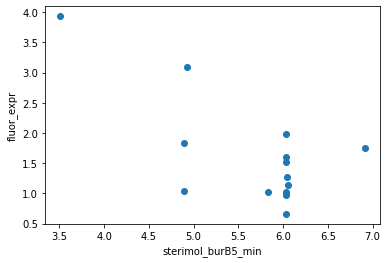

In [10]:
x = corr_data['sterimol_burB5_min']
y = corr_data['fluor_expr']

plt.scatter(x, y)
plt.xlabel('sterimol_burB5_min')
plt.ylabel('fluor_expr')
plt.show()

In [13]:
R_square = r2_score(corr_data['sterimol_burB5_min'], corr_data['fluor_expr']) 
print('Coefficient of Determination', R_square)

Coefficient of Determination -30.085742884375158
